# Project: Investigating Gun Sale and Demographic data, Henry Owens

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data sets I am investigating provide information on (1) FBI gun permit inquiries by state and month from about 1998 to 2017 and (2) US census data by state. 

> The FBI data comes from the National Instant Criminal Background Check System, which gun sellers (with exceptions, e.g., private sellers or gun show sellers) must check before selling a gun. There is a long list of types of inquiries (e.g., handgun, long gun, multiple gun). The data is arrayed in columns for the different types of permit checks, with columns for state and month. 

> The US Census data has 63 columns for different demographic information and one for state. The census data series comes in odd time periods. The most recent decennial census was done in 2010, and there are other estimates and statistics for specific points in time (e.g., Population estimates, July 1, 2016) and for date ranges (e.g., High school graduate or higher, percent of persons age 25 years+, 2011-2015). 

> These data sets can be used to show trends in gun purchases and their relationship to different demographic and geographic factors. 

> Since the NICS data does not show actual gun sales, but background checks on some potential gun sales, I will us a methodology following Jurgen Brauer to estimate gun sales from the NICS. This is well regarded proxy for people who study fire arm sales. He multiplies 'handgun' and 'long_gun' each by 1.1 and 'multiple' by 2. He based this off interviews with gun sellers in Georgia and Ohio (Brauer, US Firearems Industry, page 44). http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf

<a id='wrangling'></a>
## Data Wrangling

> The data will need considerable cleaning/wrangling. There are some useless rows/columns. The NICS data has a lot of empty values especially, and only a handful of the columns will be used to estimate gun sales based on Brauer. 

### General Properties

In [1]:
# Importing packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
%pwd

'/home/workspace'

In [2]:
# Loading the two data sets

dfcen = pd.read_csv('census_data.csv')
dfgun = pd.read_csv('gun_data.csv') 
dfcen.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,"865,454","6,651,194","27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,"814,195","6,346,298","25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,6.30%,4.80%,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,"814,180","6,346,105","25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,7.10%,6.10%,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [3]:
# Take a look... will deal with this after census
dfgun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Unnamed: 27
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,32019.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,NaN
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,NaN
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,NaN
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,NaN


In [4]:
# You see here the min value for totals is zero: apparently Hawaii doesnt have any data reported. 
# So we will have to remove them along with the territories eventually. (I realized this well into the project)

dfgun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Unnamed: 27
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000,1.0
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911,32019.0
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32019.0
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000,32019.0
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000,32019.0
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000,32019.0
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000,32019.0


In [5]:
# Lots of null values in NICS, but the columns I care about are mostly valid.

dfgun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
Unnamed: 27                  12484
dtype: int64

In [6]:
dfcen.isnull().sum()

Fact               0
Fact Note         48
Alabama            0
Alaska             0
Arizona            0
Arkansas           0
California         0
Colorado           0
Connecticut        0
Delaware           0
Florida            0
Georgia            0
Hawaii             0
Idaho              0
Illinois           0
Indiana            0
Iowa               0
Kansas             0
Kentucky           0
Louisiana          0
Maine              0
Maryland           0
Massachusetts      0
Michigan           0
Minnesota          0
Mississippi        0
Missouri           0
Montana            0
Nebraska           0
Nevada             0
New Hampshire      0
New Jersey         0
New Mexico         0
New York           0
North Carolina     0
North Dakota       0
Ohio               0
Oklahoma           0
Oregon             0
Pennsylvania       0
Rhode Island       0
South Carolina     0
South Dakota       0
Tennessee          0
Texas              0
Utah               0
Vermont            0
Virginia     

In [7]:
# Census data has numeric-like values stored as strings. 
# I also want to transpose to turn the columns to rows and vice versa. 
dfcen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
Fact              64 non-null object
Fact Note         16 non-null object
Alabama           64 non-null object
Alaska            64 non-null object
Arizona           64 non-null object
Arkansas          64 non-null object
California        64 non-null object
Colorado          64 non-null object
Connecticut       64 non-null object
Delaware          64 non-null object
Florida           64 non-null object
Georgia           64 non-null object
Hawaii            64 non-null object
Idaho             64 non-null object
Illinois          64 non-null object
Indiana           64 non-null object
Iowa              64 non-null object
Kansas            64 non-null object
Kentucky          64 non-null object
Louisiana         64 non-null object
Maine             64 non-null object
Maryland          64 non-null object
Massachusetts     64 non-null object
Michigan          64 non-null object
Minnesota

In [8]:
# Drop the useless Fact Note

dfcen = dfcen.drop(['Fact Note'], axis=1)

In [9]:
# This transposes the data to put the states as rows to conform with NICS
dfcen = dfcen.transpose()
dfcen.columns = dfcen.iloc[0]
dfcen = dfcen[1:]

dfcen.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


In [10]:
# This resets the index to numbers and puts the states in a column
dfcen.reset_index(level=0, inplace=True)
dfcen.rename(columns={'index':'State'}, inplace=True)

dfcen.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33"
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"55,521","68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95"
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"451,951","499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08"
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"198,380","231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48"
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,206,958","3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22"


In [11]:
dfcen.info()
# Need to convert these to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
State                                                                                     50 non-null object
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, p

In [12]:
# Converting relevant values to float type

col = dfcen.iloc[:,1:].columns
for c in col:
    dfcen[c].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    dfcen[c].replace(',','')
    dfcen[c] = dfcen[c].str.extract('(\d+)').astype(float)
#checking
dfcen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
State                                                                                     50 non-null object
Population estimates, July 1, 2016,  (V2016)                                              50 non-null float64
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null float64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null float64
Population, Census, April 1, 2010                                                         50 non-null float64
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null float64
Persons under 5 years, percent, April 1, 2010                                             50 non-null float64
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null float64
Persons under 18 y

In [13]:
# Here i am creating a new df that will have fewer cols to use for analysis.

dfcenx = dfcen.iloc[:,[0, 1, 4, 22, 39, 50, 63]]
dfcenx.info()

###Note: this is the index if you use separate index col:  
            #[:,[0, 1, 4, 22, 39, 50, 63]]
### this is the code if you use the state col as index 
            #[:,[0, 3, 21, 38, 49, 62]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
State                                                                             50 non-null object
Population estimates, July 1, 2016,  (V2016)                                      50 non-null float64
Population, Census, April 1, 2010                                                 50 non-null float64
Foreign born persons, percent, 2011-2015                                          50 non-null float64
In civilian labor force, total, percent of population age 16 years+, 2011-2015    50 non-null float64
Persons in poverty, percent                                                       50 non-null float64
Population per square mile, 2010                                                  50 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.8+ KB


In [14]:
# the percentage figures need to be divided by 10000
dfcenx.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population, Census, April 1, 2010","Foreign born persons, percent, 2011-2015","In civilian labor force, total, percent of population age 16 years+, 2011-2015","Persons in poverty, percent","Population per square mile, 2010"
0,Alabama,4863300.0,4779736.0,350.0,5800.0,1710.0,944.0
1,Alaska,741894.0,710231.0,740.0,6770.0,990.0,12.0
2,Arizona,6931071.0,6392017.0,1350.0,5930.0,1640.0,563.0
3,Arkansas,2988248.0,2915918.0,470.0,5850.0,1720.0,56.0
4,California,39250017.0,37253956.0,2700.0,6310.0,1430.0,2391.0


In [15]:
# Renaming the columns

dfcenx = dfcenx.rename(columns={'Fact': 'state', 'Population estimates, July 1, 2016,  (V2016)': 'pop_2016', 'Population, Census, April 1, 2010': 'pop_2010',
'Foreign born persons, percent, 2011-2015': 'pop_foreign_born', 
'In civilian labor force, total, percent of population age 16 years+, 2011-2015': 'labor_force_part',
'Persons in poverty, percent': 'poverty_rate',
'Population per square mile, 2010': 'pop_density'})

dfcenx.head()

Fact,State,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density
0,Alabama,4863300.0,4779736.0,350.0,5800.0,1710.0,944.0
1,Alaska,741894.0,710231.0,740.0,6770.0,990.0,12.0
2,Arizona,6931071.0,6392017.0,1350.0,5930.0,1640.0,563.0
3,Arkansas,2988248.0,2915918.0,470.0,5850.0,1720.0,56.0
4,California,39250017.0,37253956.0,2700.0,6310.0,1430.0,2391.0


In [16]:
# Here i am converting the percentage columns into true percentages 
# (dividing by 10000: for some reason they got multiplied by 100 twice?)
# I can come back to the original census data to add more columns if need be.
percentages = ('pop_foreign_born', 'labor_force_part', 'poverty_rate')

for p in percentages:
    dfcenx[p] = dfcenx[p] / 10000
    
dfcenx.head()

Fact,State,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density
0,Alabama,4863300.0,4779736.0,0.035,0.580,0.171,944.0
1,Alaska,741894.0,710231.0,0.074,0.677,0.099,12.0
2,Arizona,6931071.0,6392017.0,0.135,0.593,0.164,563.0
3,Arkansas,2988248.0,2915918.0,0.047,0.585,0.172,56.0
4,California,39250017.0,37253956.0,0.270,0.631,0.143,2391.0


not sure what happened but foreign born was reading as .0000004 for alabama or something. Like the x/10000 happened twice.
Oops foreign born only needed to be divided by 100

dfcenx['pop_foreign_born'] = dfcenx['pop_foreign_born'] * 100
dfcenx.head()

In [17]:
# Now to look again at NICS

dfgun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Unnamed: 27
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,32019.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,NaN
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,NaN
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,NaN
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,NaN


In [18]:
# Again, mostly good on the columns i want to look at.
dfgun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [19]:
dfcenx.shape, dfgun.shape

((50, 7), (12485, 28))

In [20]:
#we need to check which states are being listed in each df for any joining or merging later

index_gun_state = dfgun.groupby('state').sum().index
index_gun_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [21]:
#states in census
index_cen_state = dfcen.groupby('State').sum().index
len(index_cen_state)

50

In [22]:
#dfcen has extra 'states'
len(index_cen_state), len(index_gun_state)

(50, 55)

In [23]:
# find the non overlapping 'states'
for s in index_gun_state:
    if s not in index_cen_state:
        print(s)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


### Data Cleaning 
Here I am getting rid of duplicates, rearranging some things and getting things ready for the analysis. As mentioned above, I am using the methodology following Jurgen Brauer to estimate gun sales from the NICS. He multiplies 'handgun' and 'long_gun' each by 1.1 and 'multiple' by 2. He based this off interviews with gun sellers in Georgia and Ohio (Brauer, US Firearems Industry, page 44).
http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf

In [24]:
#dropping duplicates
dfcen.drop_duplicates(inplace=True)
sum(dfcen.duplicated())

0

In [25]:
dfgun.drop_duplicates(inplace=True)
sum(dfgun.duplicated())

0

In [26]:
#change column headers to lower case 
dfcenx.columns = [x.lower() for x in dfcenx.columns]

dfcenx.head()

,state,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density
0,Alabama,4863300.0,4779736.0,0.035,0.580,0.171,944.0
1,Alaska,741894.0,710231.0,0.074,0.677,0.099,12.0
2,Arizona,6931071.0,6392017.0,0.135,0.593,0.164,563.0
3,Arkansas,2988248.0,2915918.0,0.047,0.585,0.172,56.0
4,California,39250017.0,37253956.0,0.270,0.631,0.143,2391.0


In [27]:
# Convert month col from string to datetime in dfgun 
dfgun.month = pd.to_datetime(dfgun['month'], errors='coerce')

#check
dfgun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Unnamed: 27
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,32019.0
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,NaN
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,NaN
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,NaN
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,NaN


In [28]:
# Create new column for estimated sales based on Brauer. 

dfgun['estimated_sales'] = dfgun.handgun*1.1 + dfgun.long_gun * 1.1 + dfgun.multiple * 2

In [29]:
# Renaming "month" column to "date"

dfgun = dfgun.rename(columns={'month':'date'})
dfgun = dfgun.drop(['Unnamed: 27'], axis=1)

In [30]:
#this is to create separate columns for month and year because i am having trouble figuring out groupby/query with 
#datetime values
dfgun['month'] = dfgun['date'].dt.month
dfgun['year'] = dfgun['date'].dt.year
dfgun.head()

,date,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,estimated_sales,month,year
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,9.0,16.0,3.0,0.0,0.0,3.0,32019,13893.4,9,2017
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,17.0,24.0,1.0,0.0,0.0,0.0,6303,6095.0,9,2017
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,38.0,12.0,2.0,0.0,0.0,0.0,28394,22171.9,9,2017
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,13.0,23.0,0.0,0.0,2.0,1.0,17747,12183.0,9,2017
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,123506,67920.6,9,2017


In [31]:
dfgun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,estimated_sales,month,year
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000,12465.000000,12485.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911,15665.659430,6.484581,2007.792952
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387,18159.548425,3.451944,5.468296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000,3822.800000,3.000000,2003.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000,10080.400000,6.000000,2008.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000,20728.800000,9.000000,2013.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000,238224.400000,12.000000,2017.000000


In [32]:
# This was a test

dfgun_annual = dfgun.groupby(['year', 'state'], as_index=False)['estimated_sales'].sum()
dfgun_annual.head()

,year,state,estimated_sales
0,1998,Alabama,40475.0
1,1998,Alaska,4434.0
2,1998,Arizona,17531.2
3,1998,Arkansas,24097.3
4,1998,California,68286.9


In [33]:
# Now i want to extract the 'est_sales' for 2010 and 2016. 
dfgun2010 = dfgun.query('year==2010')
dfgun2016 = dfgun.query('year==2016')
# next step extract the columns for sales in 2010 and 2016, join the select census columns, run some analysis!

In [34]:
dfgun2016.iloc[0].index

Index(['date', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'estimated_sales', 'month', 'year'],
      dtype='object')

In [35]:
# here i am dropping all the numerical columns except for handgun, long_gun and est_sales.
dfgun2010 = dfgun2010.drop(['permit', 'permit_recheck',
       'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'month'], axis=1)
dfgun2016 = dfgun2016.drop(['permit', 'permit_recheck',
       'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'month'], axis=1)

In [36]:
# groupby state and year
dfgsa10 = dfgun2010.groupby(['state', 'year'], as_index=False).sum()
dfgsa16 = dfgun2016.groupby(['state', 'year'], as_index=False).sum()

In [37]:
# remove non-state rows, Guam, etc.
dfgsa10 = dfgsa10.drop([8, 11, 21, 41, 49])
dfgsa16 = dfgsa16.drop([8, 11, 21, 41, 49])


In [38]:
# reset index to state so the census df can line up
dfgsa10 = dfgsa10.set_index('state')
dfgsa16 = dfgsa16.set_index('state')

# this is not totally necessary to set index to state. but you have to reset index after dropping the territories

In [39]:
# I am making one of these for each year (2010 and 2016). 
# I will rename the estimated sales with the year and then add that to a version of dfcen
dfgsa10 = dfgsa10.rename(columns = {'estimated_sales': 'estimated_sales_2010'})

dfgsa16 = dfgsa16.rename(columns = {'estimated_sales': 'estimated_sales_2016'})
dfgsa16.head()

,year,handgun,long_gun,multiple,estimated_sales_2016
state,,,,,
Alabama,2016,153123.0,121963.0,6545,315684.6
Alaska,2016,37491.0,36887.0,2316,86447.8
Arizona,2016,166784.0,108988.0,7908,319165.2
Arkansas,2016,80244.0,82120.0,4400,187400.4
California,2016,560355.0,554550.0,0,1226395.5


In [40]:
dfgsa10 = dfgsa10.drop(['year', 'handgun', 'long_gun', 'multiple'], axis=1)
dfgsa16 = dfgsa16.drop(['year', 'handgun', 'long_gun', 'multiple'], axis=1)
dfgsa10

,estimated_sales_2010
state,
Alabama,289760.2
Alaska,67824.7
Arizona,181587.9
Arkansas,140707.8
California,572678.7
Colorado,341964.7
Connecticut,96900.1
Delaware,21239.6
Florida,602032.6


In [41]:
dfgsa10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 1 columns):
estimated_sales_2010    50 non-null float64
dtypes: float64(1)
memory usage: 800.0+ bytes


In [42]:
# Merging in two steps here
dfmerged = pd.merge(dfcenx, dfgsa10, on='state')
dfmerged = pd.merge(dfmerged, dfgsa16, on='state')
dfmerged

,state,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density,estimated_sales_2010,estimated_sales_2016
0,Alabama,4863300.0,4779736.0,0.035,0.580,0.171,944.0,289760.2,315684.6
1,Alaska,741894.0,710231.0,0.074,0.677,0.099,12.0,67824.7,86447.8
2,Arizona,6931071.0,6392017.0,0.135,0.593,0.164,563.0,181587.9,319165.2
3,Arkansas,2988248.0,2915918.0,0.047,0.585,0.172,56.0,140707.8,187400.4
4,California,39250017.0,37253956.0,0.270,0.631,0.143,2391.0,572678.7,1226395.5
5,Colorado,5540545.0,5029196.0,0.098,0.676,0.110,485.0,341964.7,493366.8
6,Connecticut,3576452.0,3574097.0,0.139,0.672,0.098,7381.0,96900.1,182806.8
7,Delaware,952065.0,897934.0,0.087,0.631,0.117,4608.0,21239.6,54120.0
8,Florida,20612439.0,18801310.0,0.197,0.588,0.147,3506.0,602032.6,1126678.0
9,Georgia,10310371.0,9687653.0,0.098,0.623,0.160,1684.0,222710.6,370340.7


In [43]:
# Dropping Hawaii from merged df
dfmerged.drop(10, inplace=True)

In [44]:
# Resetting index
dfmerged.reset_index(inplace=True, drop=True)

In [45]:
# adding columns for estimated gun sales per thousand residents. 
# I am doing per thousand because Per capita would be below one.

dfmerged['sales_per_thou_2010'] = dfmerged.estimated_sales_2010 / dfmerged.pop_2010 * 1000 
dfmerged['sales_per_thou_2016'] = dfmerged.estimated_sales_2016 / dfmerged.pop_2016 * 1000 

In [46]:
dfmerged.head()

,state,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density,estimated_sales_2010,estimated_sales_2016,sales_per_thou_2010,sales_per_thou_2016
0,Alabama,4863300.0,4779736.0,0.035,0.580,0.171,944.0,289760.2,315684.6,60.622637,64.911603
1,Alaska,741894.0,710231.0,0.074,0.677,0.099,12.0,67824.7,86447.8,95.496676,116.523115
2,Arizona,6931071.0,6392017.0,0.135,0.593,0.164,563.0,181587.9,319165.2,28.408545,46.048468
3,Arkansas,2988248.0,2915918.0,0.047,0.585,0.172,56.0,140707.8,187400.4,48.255061,62.712466
4,California,39250017.0,37253956.0,0.270,0.631,0.143,2391.0,572678.7,1226395.5,15.372292,31.245732


In [47]:
dfmerged.describe()
# the Mean for gun sales per thousand residents for all states (except Hawaii) in 2010 was 41.4 and in 2016 it was 61.4. 
# The median is similar: 39.8 in 2010 and 63.3 in 2016

,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density,estimated_sales_2010,estimated_sales_2016,sales_per_thou_2010,sales_per_thou_2016
count,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.000000
mean,6.551383e+06,6.260888e+06,0.087837,0.638143,0.136041,8881.877551,198432.338776,3.260441e+05,41.429859,61.411792
std,7.310572e+06,6.883680e+06,0.060137,0.036833,0.029884,22921.514485,175340.363700,3.021911e+05,21.245626,27.631071
min,5.855010e+05,5.636260e+05,0.015000,0.539000,0.073000,12.000000,16909.300000,3.091060e+04,6.410848,13.394741
25%,1.907116e+06,1.852994e+06,0.043000,0.612000,0.113000,431.000000,70064.800000,1.171374e+05,23.653854,41.541800
50%,4.681666e+06,4.533372e+06,0.066000,0.635000,0.133000,1012.000000,149382.200000,2.435852e+05,39.800953,63.288160
75%,7.288000e+06,6.724540e+06,0.133000,0.672000,0.154000,4608.000000,252276.400000,3.817384e+05,54.168703,81.501349
max,3.925002e+07,3.725396e+07,0.270000,0.700000,0.208000,119550.000000,812262.500000,1.297198e+06,95.496676,116.523115


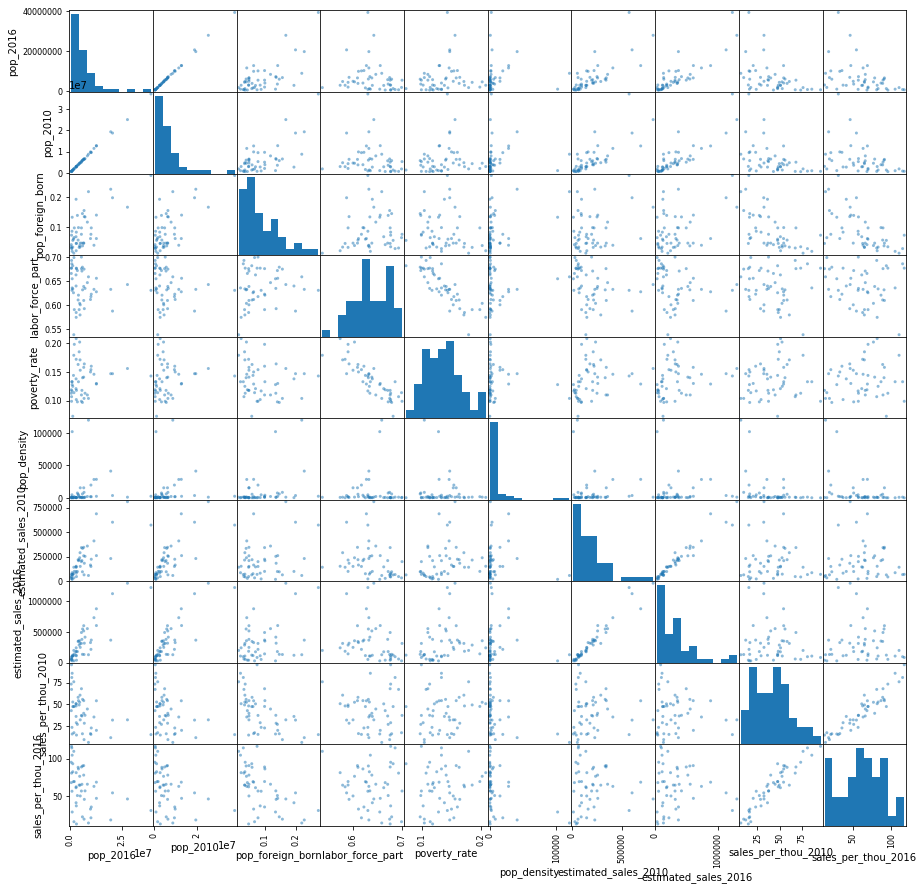

In [48]:
# This scatter matrix shows the relationships between the variables, much of which I did not have time to investigate.

pd.plotting.scatter_matrix(dfmerged, figsize=(15, 15));

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What are the trends over time in gun sales? 

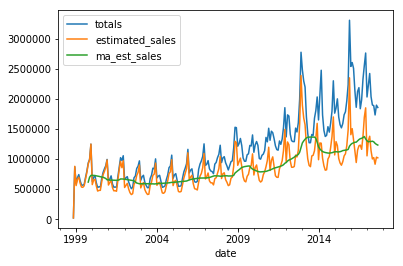

In [49]:
# I am making a new df to plot the monthly figures for NICS 'totals' and estimated sales. 
# We can see there is cyclicality and a long-term trend.

dfgunsales_monthly = dfgun.groupby(['date'], as_index=True)['totals','estimated_sales'].sum()

# I am adding a moving average to est sales to smooth out the trend. 

dfgunsales_monthly['ma_est_sales'] = dfgunsales_monthly['estimated_sales'].rolling(12).mean()


dfgunsales_monthly.plot(kind='line');

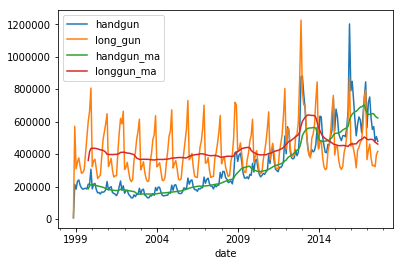

In [50]:
# Here I create a similar chart but breaking down between handgun ang long gun (also with the moving average trend)
dfgunsales_hg_lg = dfgun.groupby(['date'], as_index=True)['handgun', 'long_gun'].sum()

dfgunsales_hg_lg ['handgun_ma'] = dfgunsales_hg_lg ['handgun'].rolling(12).mean()
dfgunsales_hg_lg ['longgun_ma'] = dfgunsales_hg_lg ['long_gun'].rolling(12).mean()

#x = dfgunsales_monthly['handgun_ma']
#y = dfgunsales_monthly['longgun_ma']
dfgunsales_hg_lg.plot(kind='line');

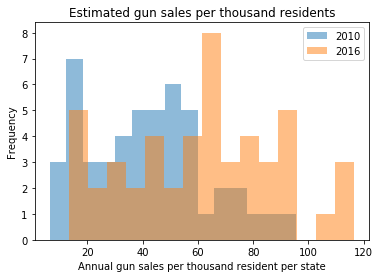

In [51]:
# histogram of gun sales per thousand residents.

x = dfmerged['sales_per_thou_2010']
y = dfmerged['sales_per_thou_2016']


plt.hist(x, bins=15, alpha=0.5, label='2010')
plt.hist(y, bins=15, alpha=0.5, label='2016')
plt.legend(loc='upper right')
plt.title('Estimated gun sales per thousand residents')
plt.xlabel('Annual gun sales per thousand resident per state')
plt.ylabel('Frequency');

In [52]:
# looking at descriptive statistics.
dfmerged.describe()
# the Mean for gun sales per thousand residents for all states (except Hawaii) in 2010 was 41.4 and in 2016 it was 61.4. 
# The median is similar: 39.8 in 2010 and 63.3 in 2016

,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density,estimated_sales_2010,estimated_sales_2016,sales_per_thou_2010,sales_per_thou_2016
count,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.000000
mean,6.551383e+06,6.260888e+06,0.087837,0.638143,0.136041,8881.877551,198432.338776,3.260441e+05,41.429859,61.411792
std,7.310572e+06,6.883680e+06,0.060137,0.036833,0.029884,22921.514485,175340.363700,3.021911e+05,21.245626,27.631071
min,5.855010e+05,5.636260e+05,0.015000,0.539000,0.073000,12.000000,16909.300000,3.091060e+04,6.410848,13.394741
25%,1.907116e+06,1.852994e+06,0.043000,0.612000,0.113000,431.000000,70064.800000,1.171374e+05,23.653854,41.541800
50%,4.681666e+06,4.533372e+06,0.066000,0.635000,0.133000,1012.000000,149382.200000,2.435852e+05,39.800953,63.288160
75%,7.288000e+06,6.724540e+06,0.133000,0.672000,0.154000,4608.000000,252276.400000,3.817384e+05,54.168703,81.501349
max,3.925002e+07,3.725396e+07,0.270000,0.700000,0.208000,119550.000000,812262.500000,1.297198e+06,95.496676,116.523115


#### Gun sales trended up recently especially over the period of 2010 to 2016 when we have two census data points on state population. 

>Sales of guns climbed steadily in recent years with some spikes. Sales of handguns have driven the increase. Before 2014 long guns sold in greater volume, but around that time hand guns over took the volume of sales according to the NICS background check data. 

>Additionally the number of gun sales to state residents increased between 2010 and 2016. 

>The the Mean for gun sales per thousand residents for all states (except Hawaii) in 2010 was 41.4 and in 2016 it was 61.4. The median is similar: 39.8 in 2010 and 63.3 in 2016. The above histogram shows the 2016 data skewing to the right. 

### Research Question 2: What were the top months/years for gun sales and in what states?

In [53]:
#What state had the highest monthly estimated sales and when?
    # Setting a variable for the index of the max of estimated sales. 
    # Returning iloc of that row with date, state and est sales based on col index

max_state = dfgun['estimated_sales'].idxmax()

dfgun.iloc[max_state, [0, 1, -3]]

date               2012-12-01 00:00:00
state                            Texas
estimated_sales                 238224
Name: 3181, dtype: object

In [54]:
# Sorting dfgun by estimated sales and returning the twenty highest values with date and state.
dfgun_sort = dfgun.sort_values(by=['estimated_sales'], ascending=False)
dfgun_sort.iloc[0:20, [0, 1, -3]]

,date,state,estimated_sales
3181,2012-12-01,Texas,238224.4
1201,2015-12-01,Texas,215228.1
3126,2013-01-01,Texas,172683.7
499,2016-12-01,California,172560.3
1861,2014-12-01,Texas,165665.1
541,2016-12-01,Texas,158694.5
2521,2013-12-01,Texas,153819.4
554,2016-11-01,California,153434.6
1164,2015-12-01,Florida,151989.9
3071,2013-02-01,Texas,149070.5


>Unsurprisingly, the big states (especially Texas) take up the highest monthly gun sales. December accounts for most of the 20 highest selling months, presumably because of the holidays. The biggest selling month for a single state was December 2012, the month of the Sandy Hook massacre. Sales spike in response to mass shootings in anticipation of stricter gun control. 

https://en.wikipedia.org/wiki/Sandy_Hook_Elementary_School_shooting

In [55]:
#idxmax for pop adjusted sales

max_sales_pop = dfmerged['sales_per_thou_2016'].idxmax()

dfmerged.iloc[max_sales_pop]

state                    Alaska
pop_2016                 741894
pop_2010                 710231
pop_foreign_born          0.074
labor_force_part          0.677
poverty_rate              0.099
pop_density                  12
estimated_sales_2010    67824.7
estimated_sales_2016    86447.8
sales_per_thou_2010     95.4967
sales_per_thou_2016     116.523
Name: 1, dtype: object

In [56]:
dfmerged_sort = dfmerged.sort_values(by=['sales_per_thou_2016'], ascending=False)
dfmerged_sort.iloc[0:10, [0, 1, -2, -1]]

,state,pop_2016,sales_per_thou_2010,sales_per_thou_2016
1,Alaska,741894.0,95.496676,116.523115
39,South Dakota,865454.0,80.881009,114.407236
46,West Virginia,1831102.0,75.967164,109.834351
24,Montana,1042520.0,85.732074,104.722307
48,Wyoming,585501.0,73.312622,95.324175
27,New Hampshire,1334795.0,47.530745,93.378384
40,Tennessee,6651194.0,54.312811,90.877969
23,Missouri,6093000.0,55.777938,90.384737
5,Colorado,5540545.0,67.995898,89.046619
34,Oklahoma,3923561.0,58.140574,88.615036


>Alaska had the most sales per thousand residents at 116.5. 

In [57]:
min_sales_pop = dfmerged['sales_per_thou_2016'].idxmin()

dfmerged.iloc[min_sales_pop]

state                          Iowa
pop_2016                3.13469e+06
pop_2010                3.04636e+06
pop_foreign_born              0.047
labor_force_part              0.676
poverty_rate                  0.118
pop_density                     545
estimated_sales_2010        45178.8
estimated_sales_2016        41988.4
sales_per_thou_2010         14.8304
sales_per_thou_2016         13.3947
Name: 13, dtype: object

>Iowa had the lowest gun sales per resident at 13.4. 

### Research Question 3: How have gun sales per resident changed between 2010 and 2016?

In [58]:
# Making tables for changes in gun sales per resident

dfmerged['change_2010_to_2016'] = (dfmerged['sales_per_thou_2016'] - dfmerged['sales_per_thou_2010']) / dfmerged['sales_per_thou_2010']
dfdiff = dfmerged.sort_values(by=['change_2010_to_2016'])

dfdiff.iloc[0:10, [0, 1, -3, -2, -1]]

,state,pop_2016,sales_per_thou_2010,sales_per_thou_2016,change_2010_to_2016
13,Iowa,3134693.0,14.830445,13.394741,-0.096808
25,Nebraska,1907116.0,17.538784,16.357736,-0.067339
0,Alabama,4863300.0,60.622637,64.911603,0.070749
26,Nevada,2940058.0,36.216609,41.541800,0.147037
32,North Dakota,757952.0,67.218562,80.916470,0.203782
14,Kansas,2907289.0,50.633377,61.532376,0.215253
1,Alaska,741894.0,95.496676,116.523115,0.220180
24,Montana,1042520.0,85.732074,104.722307,0.221507
36,Pennsylvania,12784227.0,54.168703,68.866917,0.271341
42,Utah,3051217.0,29.016656,37.384886,0.288394


In [59]:
#States with biggest growth in gun sales per resident (values are ascending.)

dfdiff.iloc[-10:, [0, 1, -3, -2, -1]]

,state,pop_2016,sales_per_thou_2010,sales_per_thou_2016,change_2010_to_2016
37,Rhode Island,1056426.0,16.064821,29.259598,0.821346
6,Connecticut,3576452.0,27.111771,51.114009,0.885307
27,New Hampshire,1334795.0,47.530745,93.378384,0.964589
12,Indiana,6633053.0,39.800953,78.260192,0.966289
20,Michigan,9928300.0,16.539666,33.136962,1.003484
4,California,39250017.0,15.372292,31.245732,1.032601
19,Massachusetts,6811779.0,9.619375,19.768522,1.055073
28,New Jersey,8944469.0,6.410848,14.677540,1.289485
11,Illinois,12801539.0,20.251925,47.408253,1.340926
7,Delaware,952065.0,23.653854,56.844858,1.403196


In [60]:
dfdiff.iloc[18, [0,1,2,-3,-2,-1]]

state                  West Virginia
pop_2016                  1.8311e+06
pop_2010                 1.85299e+06
sales_per_thou_2010          75.9672
sales_per_thou_2016          109.834
change_2010_to_2016         0.445813
Name: 46, dtype: object

In [61]:
dfdiff.describe()

,pop_2016,pop_2010,pop_foreign_born,labor_force_part,poverty_rate,pop_density,estimated_sales_2010,estimated_sales_2016,sales_per_thou_2010,sales_per_thou_2016,change_2010_to_2016
count,4.900000e+01,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000
mean,6.551383e+06,6.260888e+06,0.087837,0.638143,0.136041,8881.877551,198432.338776,3.260441e+05,41.429859,61.411792,0.556061
std,7.310572e+06,6.883680e+06,0.060137,0.036833,0.029884,22921.514485,175340.363700,3.021911e+05,21.245626,27.631071,0.336714
min,5.855010e+05,5.636260e+05,0.015000,0.539000,0.073000,12.000000,16909.300000,3.091060e+04,6.410848,13.394741,-0.096808
25%,1.907116e+06,1.852994e+06,0.043000,0.612000,0.113000,431.000000,70064.800000,1.171374e+05,23.653854,41.541800,0.309588
50%,4.681666e+06,4.533372e+06,0.066000,0.635000,0.133000,1012.000000,149382.200000,2.435852e+05,39.800953,63.288160,0.527730
75%,7.288000e+06,6.724540e+06,0.133000,0.672000,0.154000,4608.000000,252276.400000,3.817384e+05,54.168703,81.501349,0.707020
max,3.925002e+07,3.725396e+07,0.270000,0.700000,0.208000,119550.000000,812262.500000,1.297198e+06,95.496676,116.523115,1.403196


> Only two states saw a decline in their gun sales per resident: Iowa and Nebraska. Every other state except Alabama (7%) saw double digit increases. Gun sales per resident doubled (or more) in six states from 2010 and 2016. The 25 percentile change in gun sales from 2010 to 2016 was 30.9%. In West Virginia, where the population declined slightly over the 6 years (1.2%), gun sales grew by 44.5% over the same 6 years relative the population. 


<a id='conclusions'></a>
## Conclusions

> Gun sales in the US are increasing almost without exception, even as the population grows. The data required some significant wrangling and cleaning (the census data was stored as string format). An estimate for final gun sales was taken from the NICS data using the method of Jurgen Brauer of Augusta University in Georgia. The gun sale data was provided in monthly intervals from late 1998 to mid 2017, giving a useful time series, but there were also missing/irrelevant data. For example no figures from Hawaii was in the dataset, but there was informtaion from Puerto Rico and other territories that did have any correspoding statistics in the census dataset. 

> There is so much to explore with this data. I chose to look at the time series of gun sales estimates. Then I used those estimates to create population adjusted sales estimates for the 49 states other than Hawaii using the census data. This created a picture of diverse gun buying trends across the states in the two snapshot years: 2010 and 2016. But again the trend is nearly all pointing to increased gun sales. Even in states like New Jersey where 6.4 guns were sold per thousand residents in 2010, the figure more than doubled to 14.7 for 2016. 

> In this data you can see things that I read about in the news: booming gun sales (1) after Obama was elected (2) after the Sandy Hook massacre in December 2012. Those events were supposed to bring about greater gun control, but in the end they did not. Overall this was a very interesting project, but it is a morbid trend in the US that gun sales keep climbing. It would be important to get more up-to-date statistics to see how things have changed since 2017.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0